In [101]:
import os
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf
import librosa as rosa
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras import layers
from tensorflow.keras import models

from IPython.display import display, HTML, Audio
import datetime
from tensorflow import keras
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization
from tensorflow.data import Dataset
import matplotlib.pyplot as plt

print(f"Tensorflow v{tf.__version__}")

Tensorflow v2.12.0


In [102]:
command_words = [
    'komputer',
    'other'
]

In [103]:
# set the width and height of the spectrogram
IMG_WIDTH=99
IMG_HEIGHT=13

In [114]:
BATCH_SIZE = 64

def load_tfrecord_data(filename):
    dataset = tf.data.TFRecordDataset(filename)
    def parse_record(record):
        feature_description = {
            'mfcc': tf.io.FixedLenFeature([IMG_WIDTH, IMG_HEIGHT, 1], tf.float32),
            'label': tf.io.FixedLenFeature([], tf.float32)
        }
        example = tf.io.parse_single_example(record, feature_description)
        return example['mfcc'], example['label']

    dataset = dataset.map(parse_record).prefetch(tf.data.AUTOTUNE)
    dataset = dataset.shuffle(buffer_size=1024, reshuffle_each_iteration=False)
    num_samples = sum(1 for _ in dataset)
    print(num_samples)
    
    val_samples = int(np.floor(0.05 * num_samples))
    test_samples = int(np.floor(0.05 * num_samples))
    train_samples = num_samples - val_samples - test_samples

    train_dataset = dataset.take(train_samples)
    val_dataset = dataset.skip(train_samples).take(val_samples)
    test_dataset = dataset.skip(train_samples + val_samples).take(test_samples)
    
    train_dataset = train_dataset.batch(BATCH_SIZE).cache()
    val_dataset = val_dataset.batch(BATCH_SIZE).cache()
    test_dataset = test_dataset.batch(BATCH_SIZE).cache()

    return train_dataset, val_dataset, test_dataset

In [115]:
train_dataset, val_dataset, test_dataset = load_tfrecord_data("mfcc.tfrecord")

252340


In [116]:
# plt.hist(train_dataset, bins=range(0,len(command_words)+1), align='left')

In [117]:
# unique, counts = np.unique(train_Y, return_counts=True)
# dict(zip([command_words[i] for i in unique], counts))

In [118]:
# Y_train = tf.one_hot(train_Y, len(command_words))
# Y_validate = tf.one_hot(validate_Y, len(command_words))
# Y_test = tf.one_hot(test_Y, len(command_words))

In [119]:
# batch_size = 64

# train_dataset = Dataset.from_tensor_slices(
#     train_dataset
# ).repeat(
#     count=-1
# ).shuffle(
#     len(train_X)
# ).batch(
#     batch_size
# )

# validation_dataset = Dataset.from_tensor_slices((validate_X, Y_validate)).batch(batch_size)

# test_dataset = Dataset.from_tensor_slices((test_X, Y_test)).batch(batch_size)

In [120]:
DEBUG = True
def plot_mfcc(mfcc, ax=None, desc=None):
    if not DEBUG:
        return

    if desc is not None:
        display(HTML(f'<h1><center>{desc}</center></h1>'))

    axe = ax
    if ax is None:
        _, axe = plt.subplots(figsize=(10, 6))

    mfcc = np.squeeze(mfcc)
    mfcc = np.rot90(mfcc)

    im = axe.imshow(mfcc, aspect='auto', origin='lower', cmap='hot')
    axe.figure.colorbar(im, ax=axe, label='Coefficient')
    axe.set_title('MFCC')
    axe.set_xlabel('Frame')
    axe.set_ylabel('Channel')
    
    if ax is None:
        plt.show()

tf.Tensor(1.0, shape=(), dtype=float32)


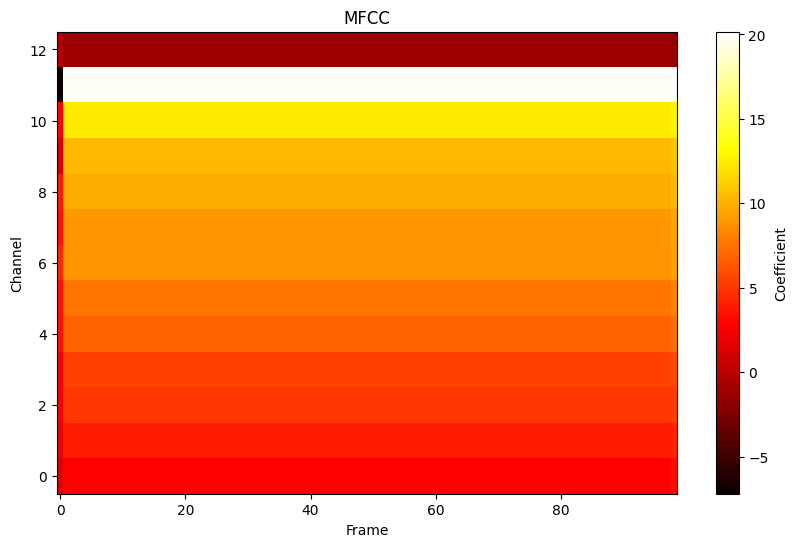

tf.Tensor(1.0, shape=(), dtype=float32)


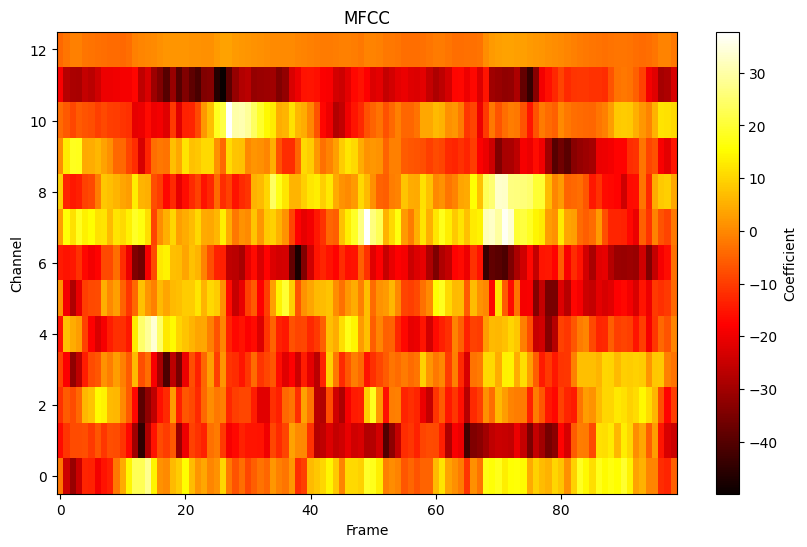

tf.Tensor(1.0, shape=(), dtype=float32)


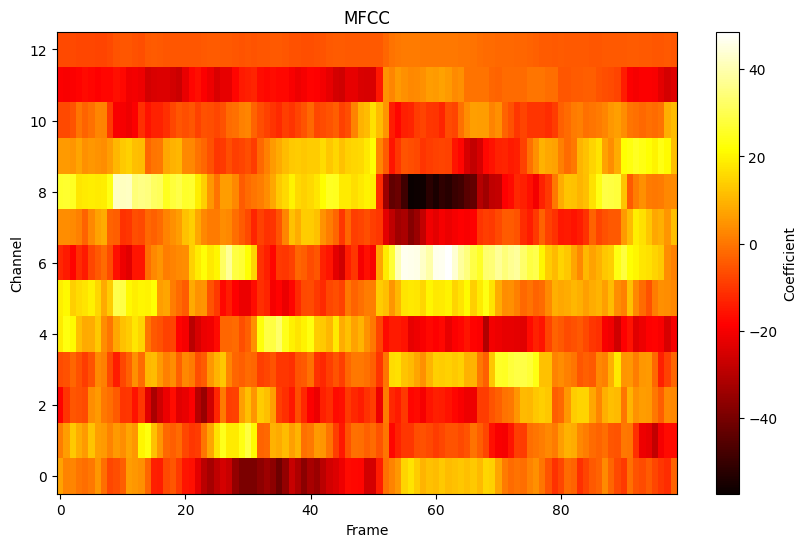

tf.Tensor(1.0, shape=(), dtype=float32)


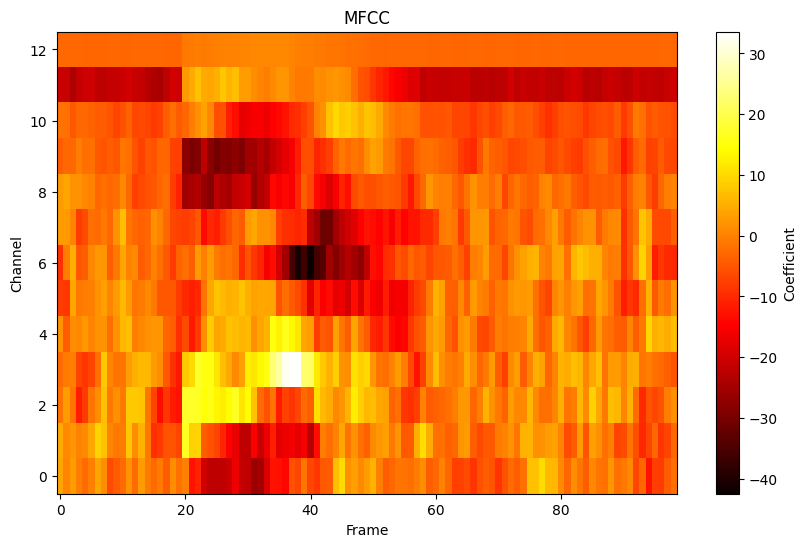

tf.Tensor(0.0, shape=(), dtype=float32)


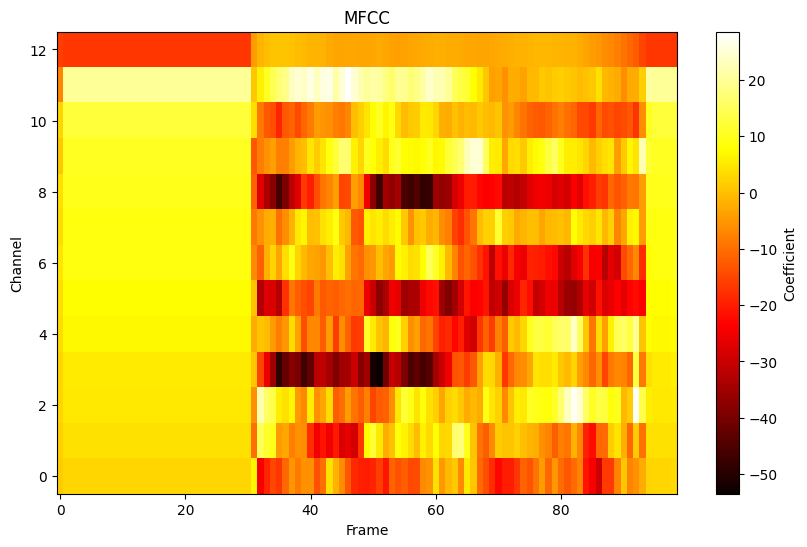

tf.Tensor(1.0, shape=(), dtype=float32)


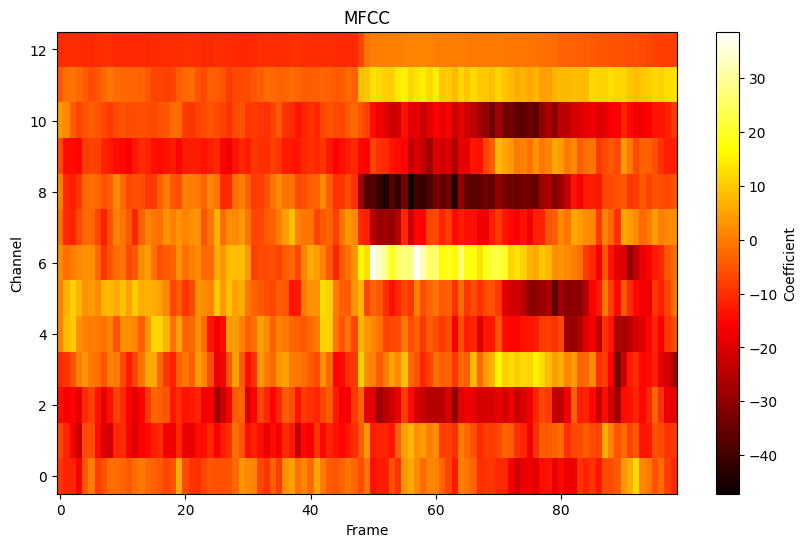

tf.Tensor(0.0, shape=(), dtype=float32)


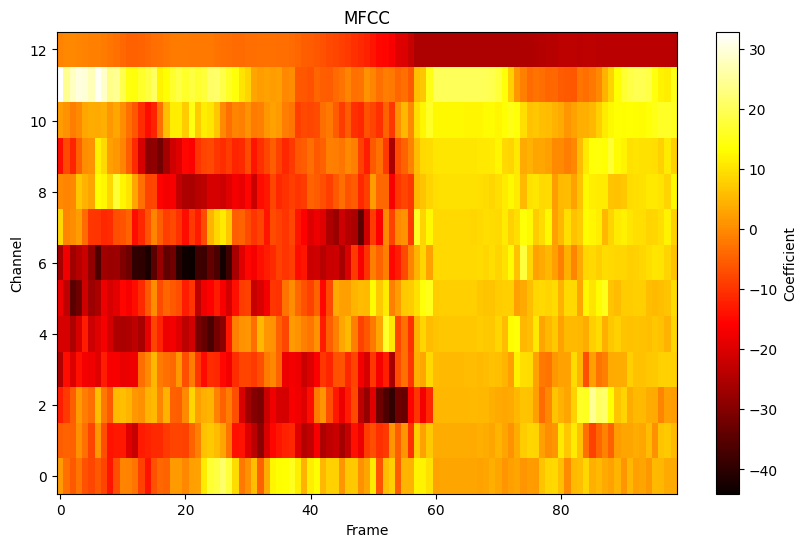

tf.Tensor(1.0, shape=(), dtype=float32)


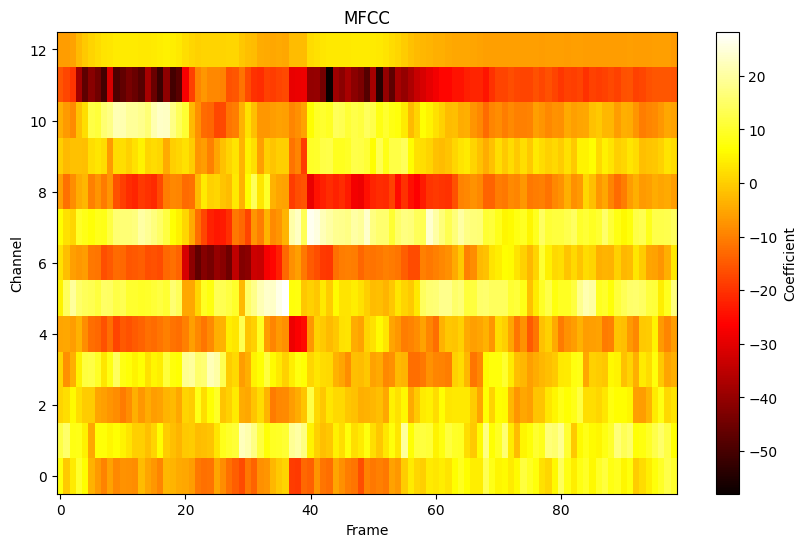

tf.Tensor(1.0, shape=(), dtype=float32)


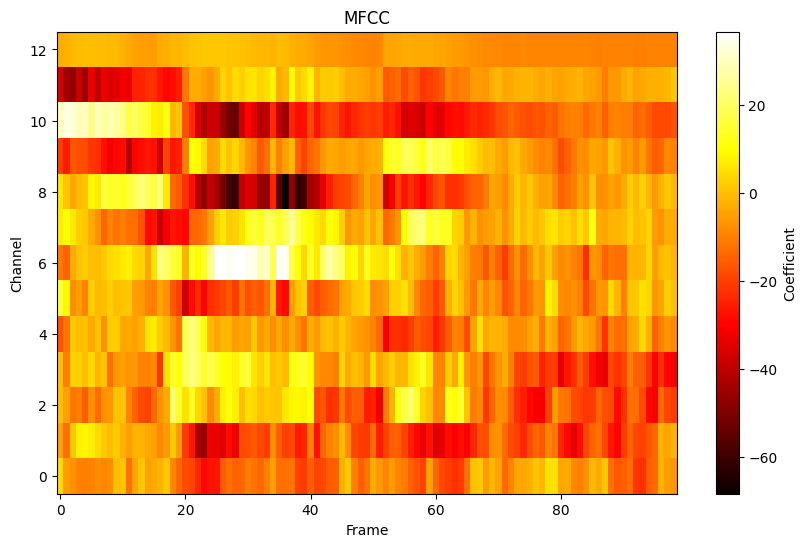

tf.Tensor(0.0, shape=(), dtype=float32)


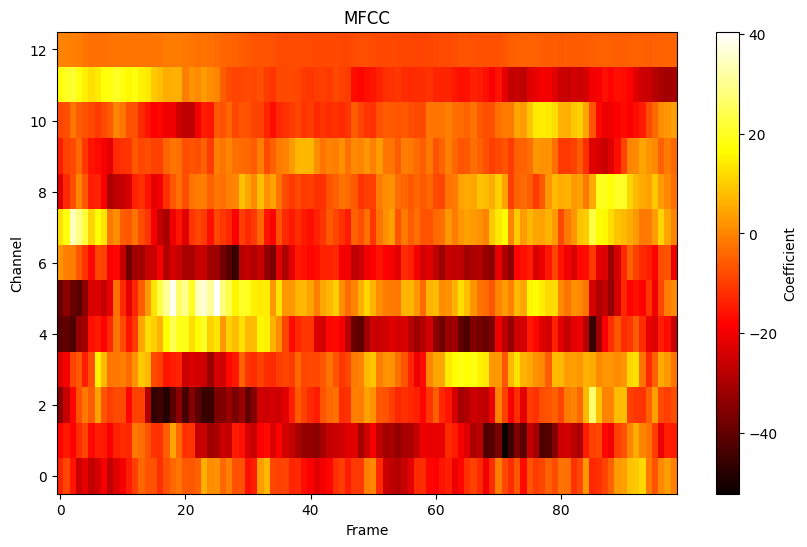

tf.Tensor(1.0, shape=(), dtype=float32)


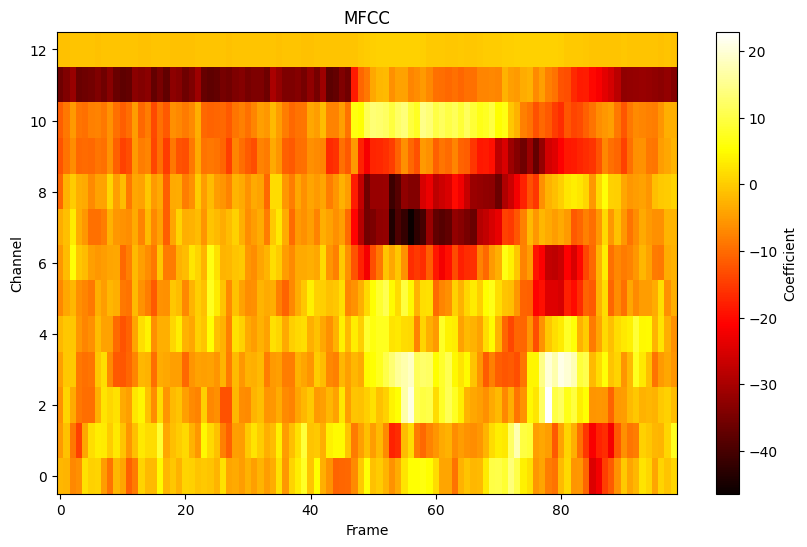

tf.Tensor(1.0, shape=(), dtype=float32)


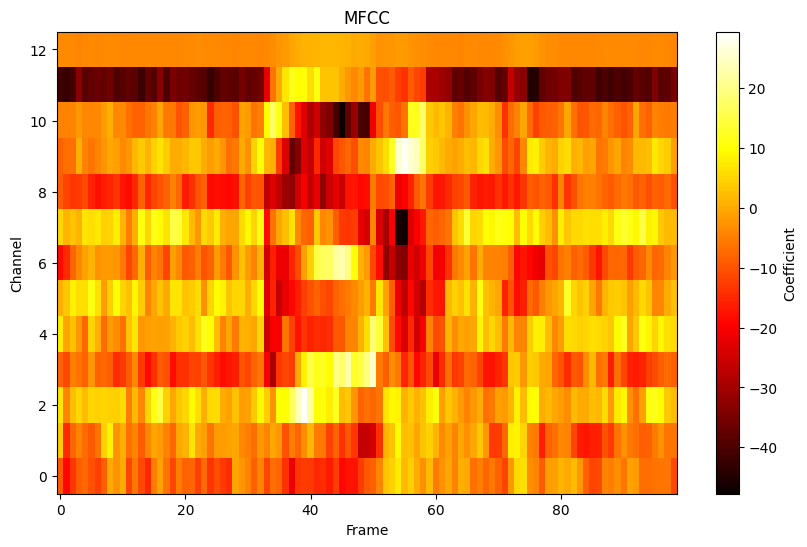

tf.Tensor(0.0, shape=(), dtype=float32)


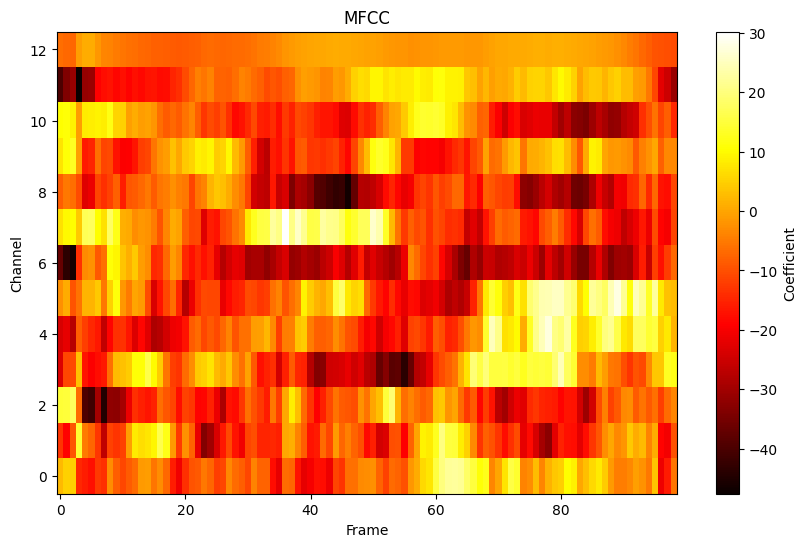

tf.Tensor(1.0, shape=(), dtype=float32)


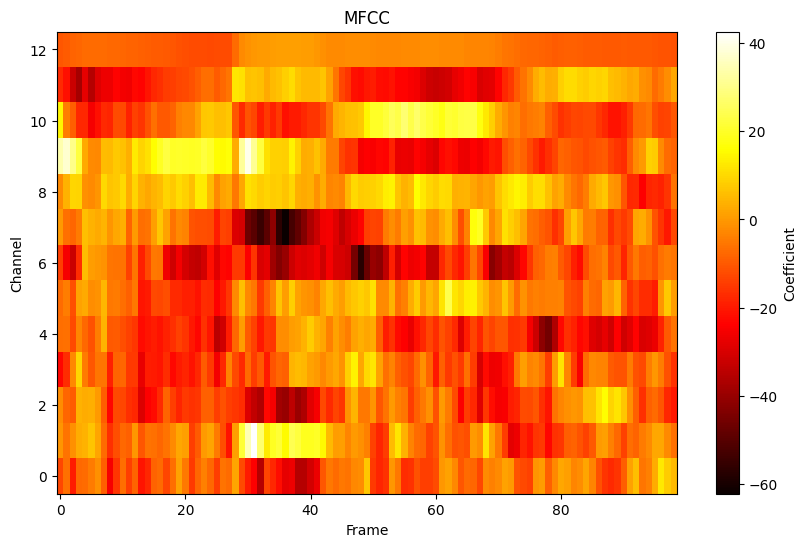

tf.Tensor(1.0, shape=(), dtype=float32)


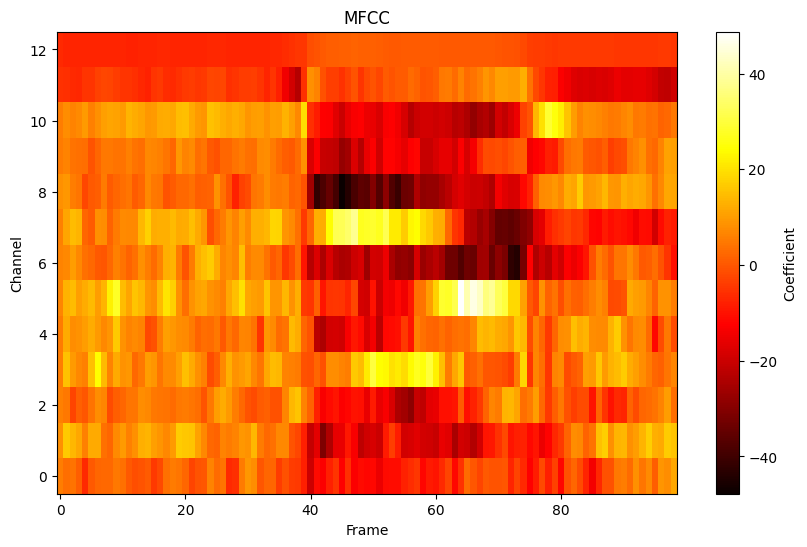

tf.Tensor(0.0, shape=(), dtype=float32)


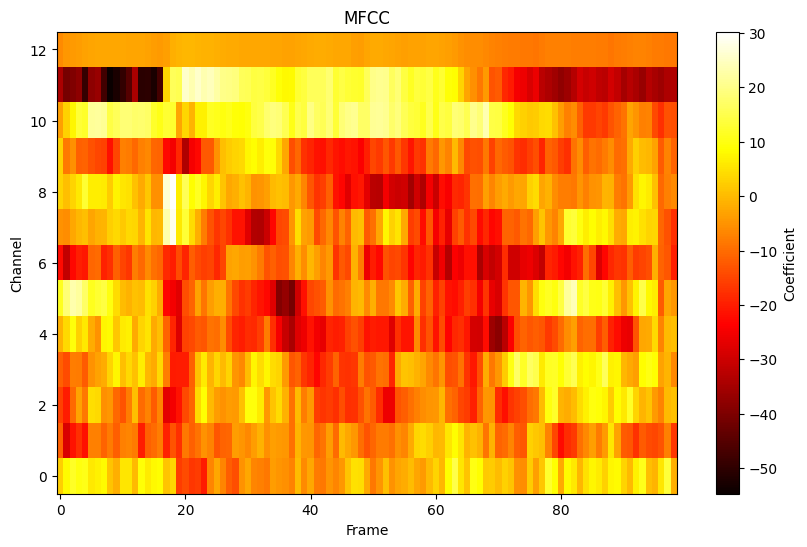

tf.Tensor(0.0, shape=(), dtype=float32)


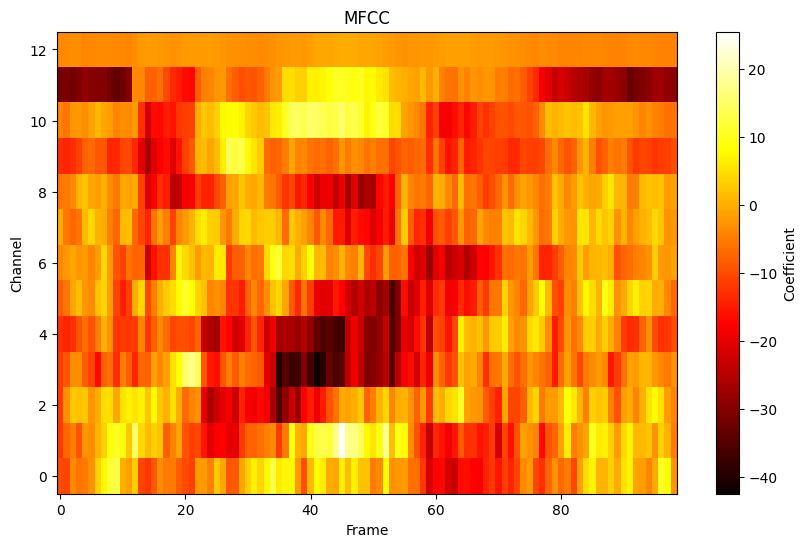

tf.Tensor(1.0, shape=(), dtype=float32)


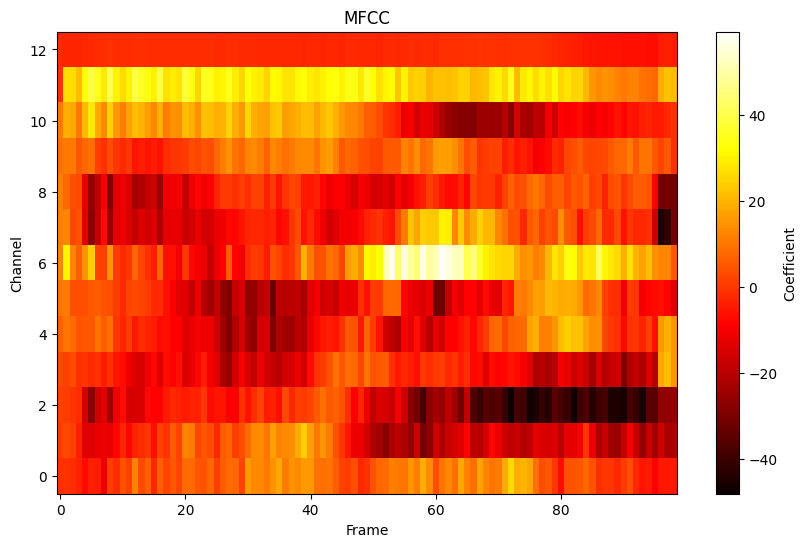

tf.Tensor(0.0, shape=(), dtype=float32)


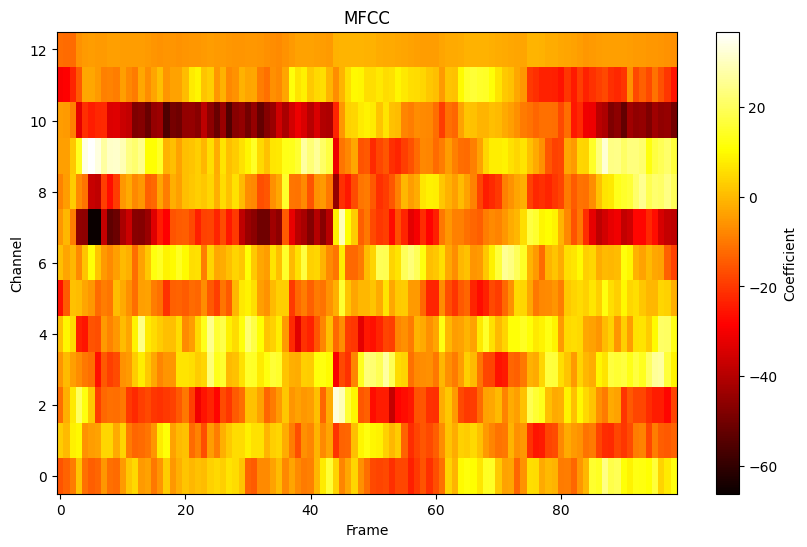

tf.Tensor(1.0, shape=(), dtype=float32)


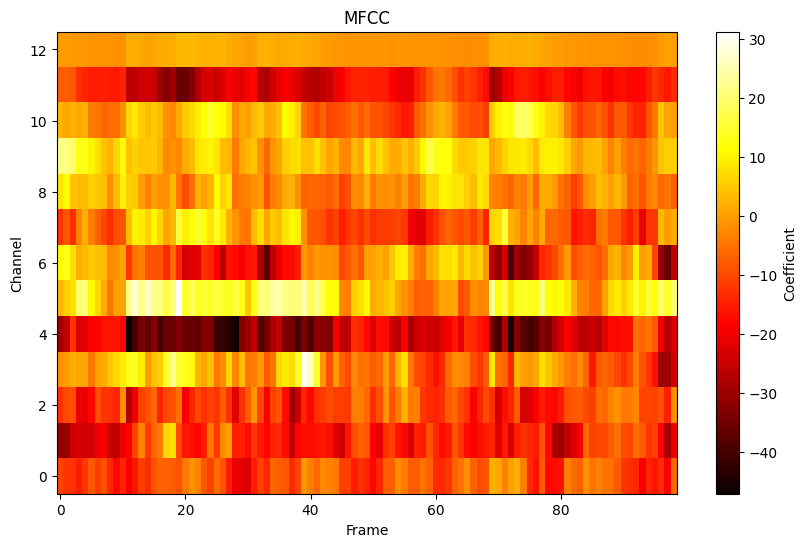

tf.Tensor(1.0, shape=(), dtype=float32)


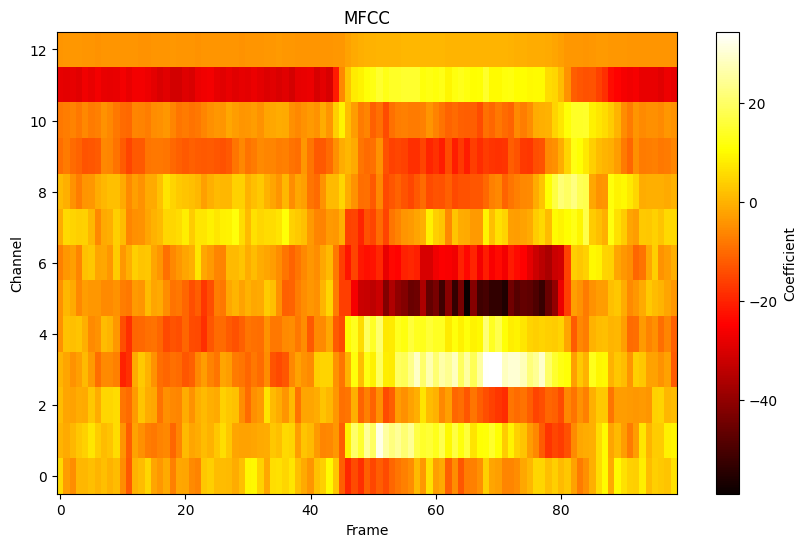

tf.Tensor(1.0, shape=(), dtype=float32)


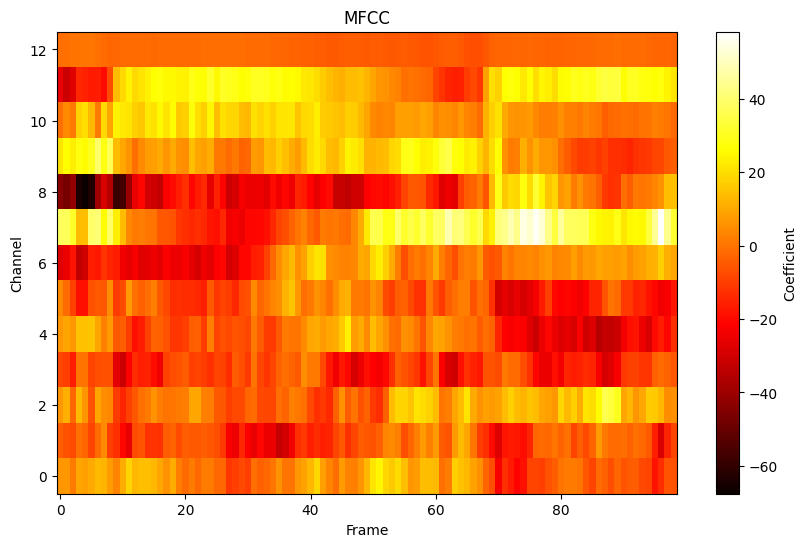

tf.Tensor(1.0, shape=(), dtype=float32)


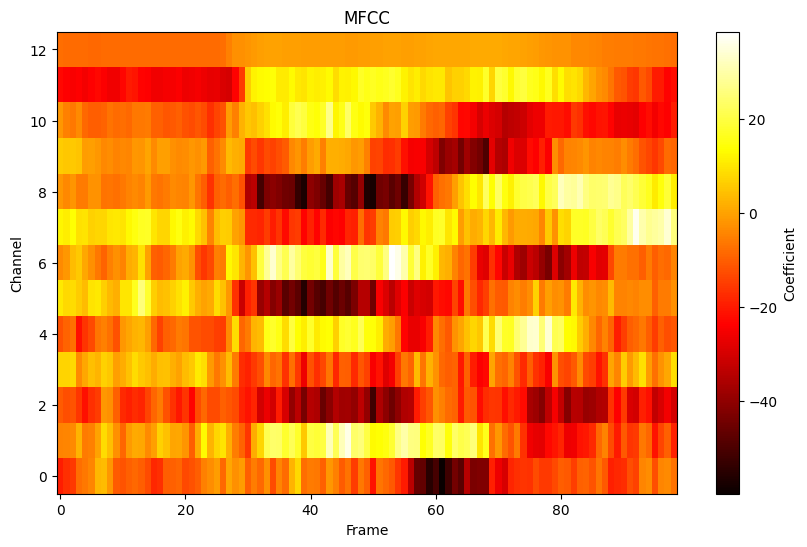

tf.Tensor(0.0, shape=(), dtype=float32)


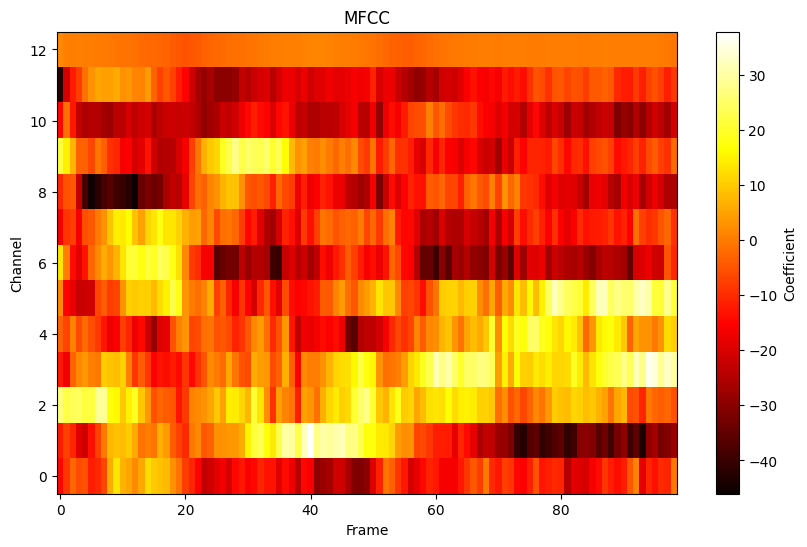

tf.Tensor(1.0, shape=(), dtype=float32)


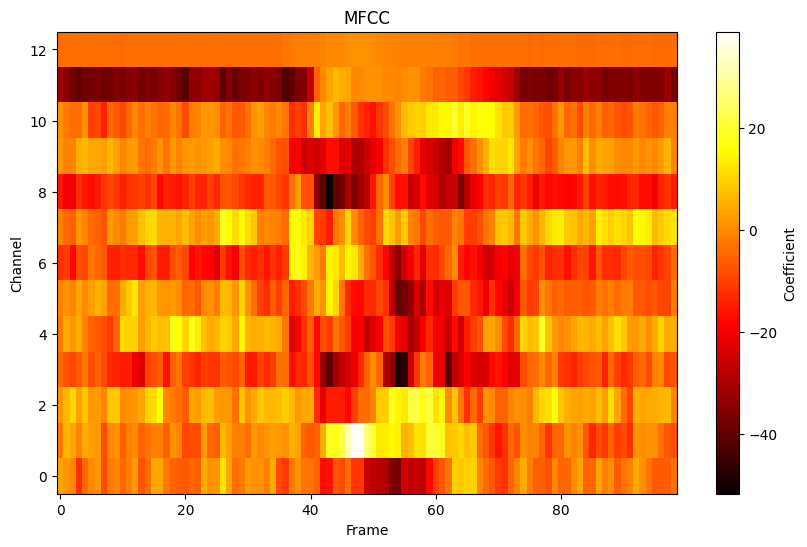

tf.Tensor(1.0, shape=(), dtype=float32)


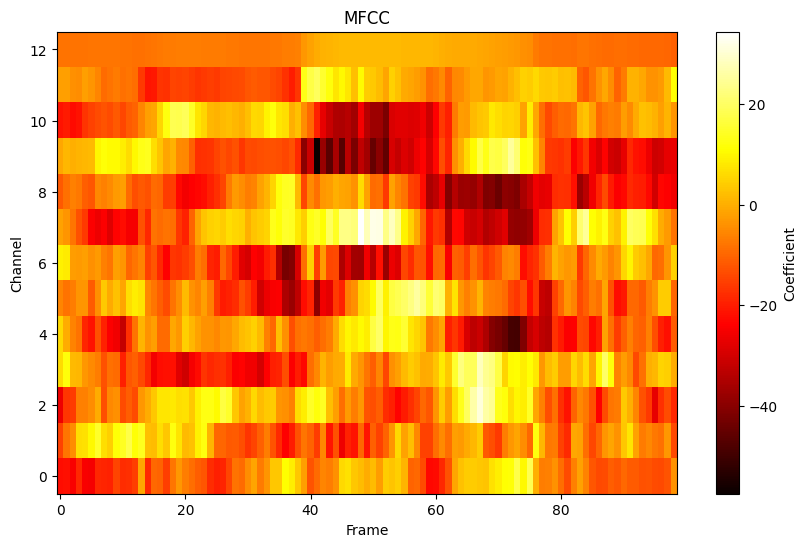

tf.Tensor(0.0, shape=(), dtype=float32)


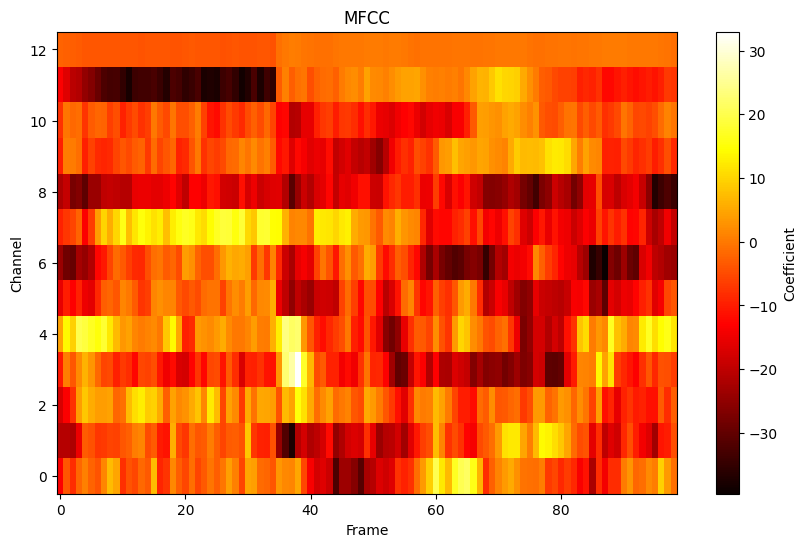

tf.Tensor(0.0, shape=(), dtype=float32)


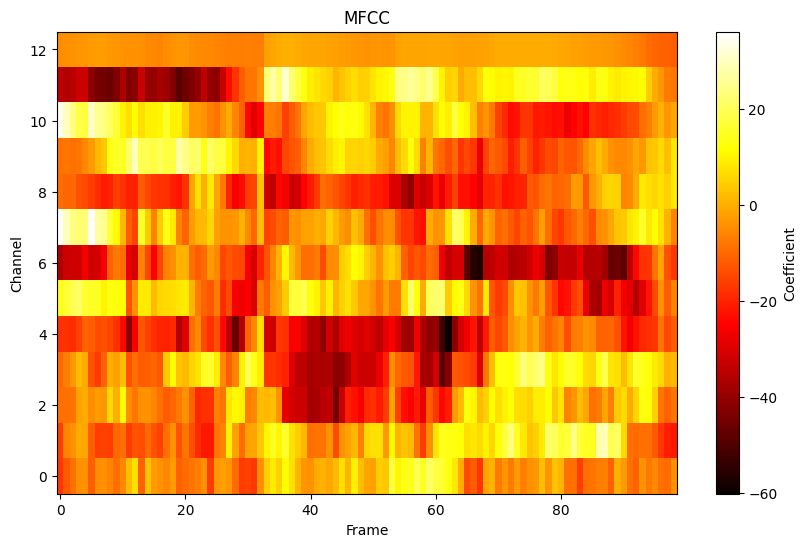

tf.Tensor(1.0, shape=(), dtype=float32)


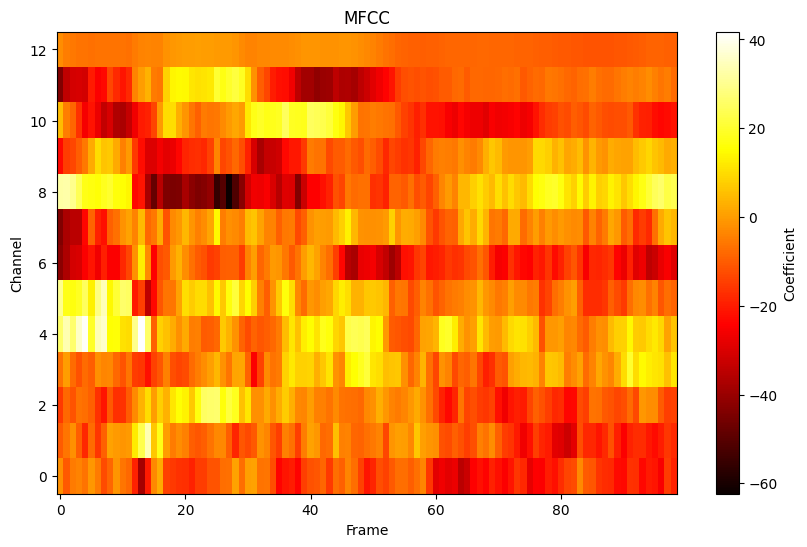

tf.Tensor(0.0, shape=(), dtype=float32)


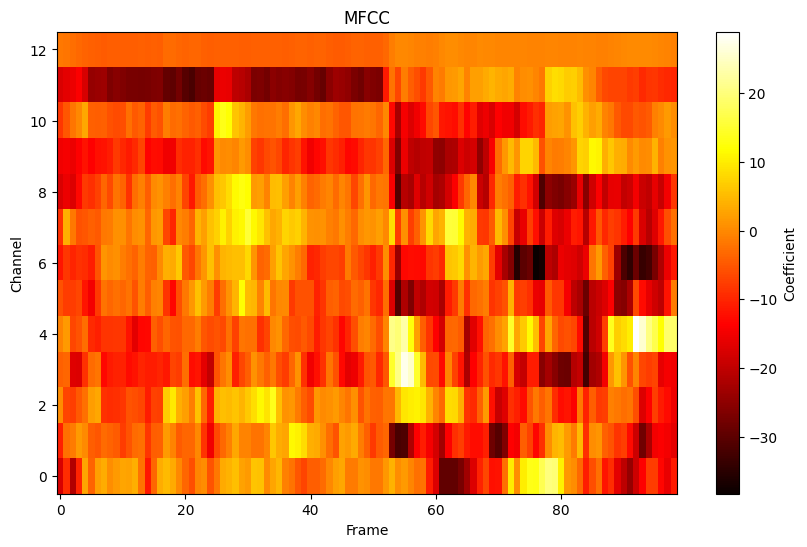

tf.Tensor(0.0, shape=(), dtype=float32)


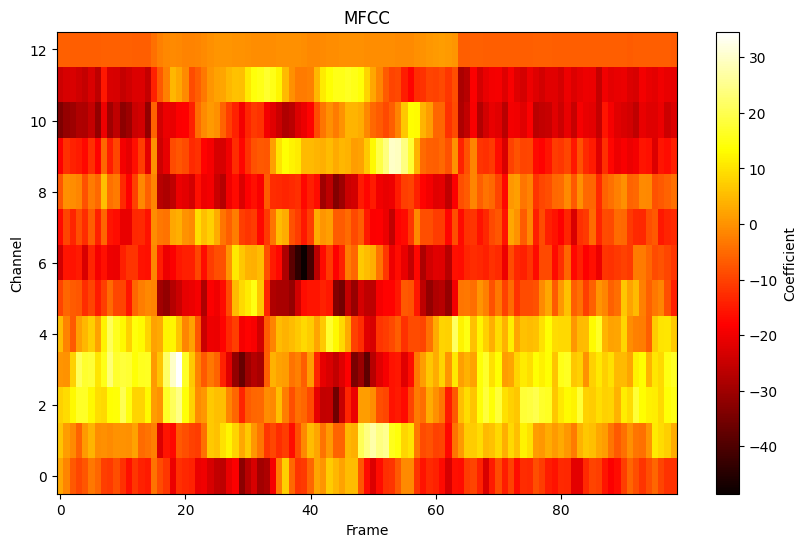

tf.Tensor(1.0, shape=(), dtype=float32)


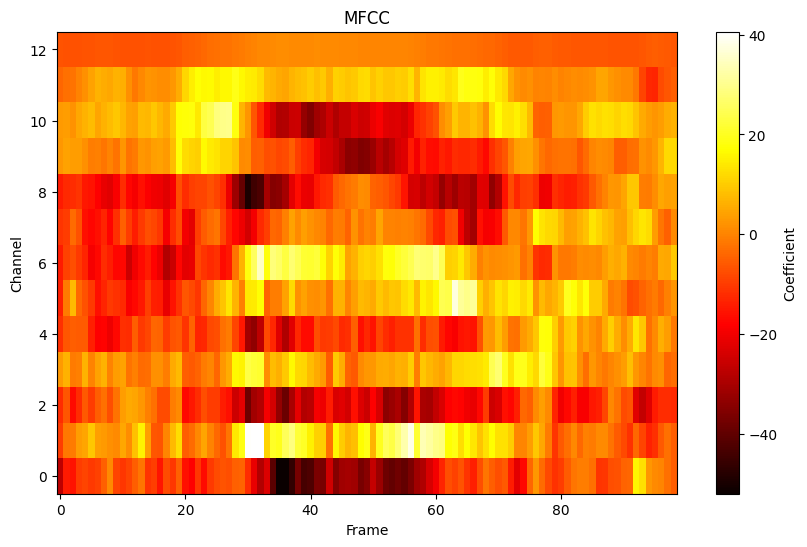

tf.Tensor(0.0, shape=(), dtype=float32)


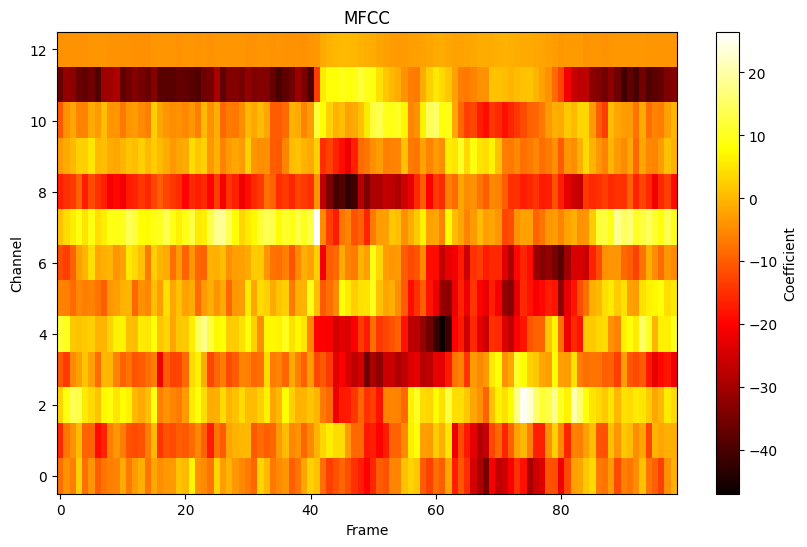

tf.Tensor(1.0, shape=(), dtype=float32)


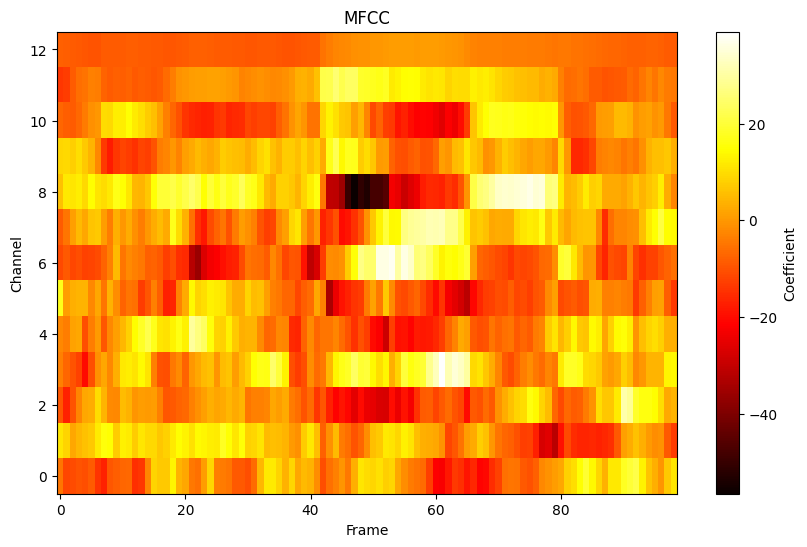

tf.Tensor(1.0, shape=(), dtype=float32)


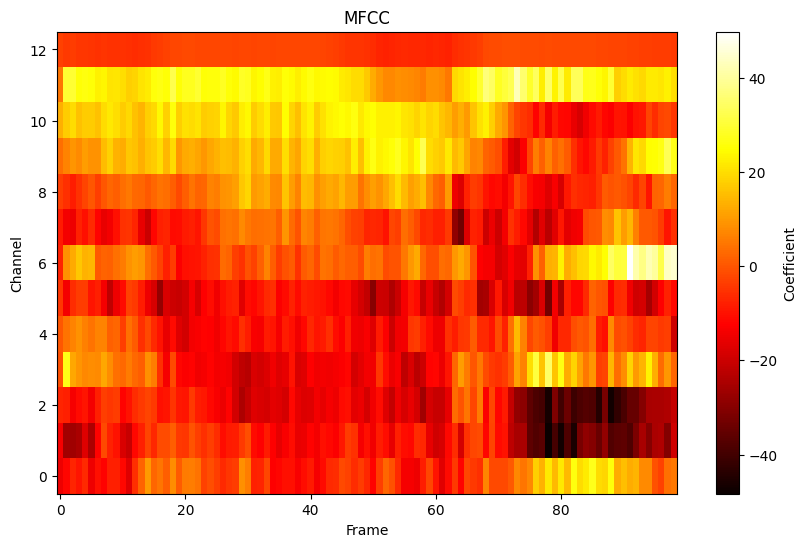

tf.Tensor(0.0, shape=(), dtype=float32)


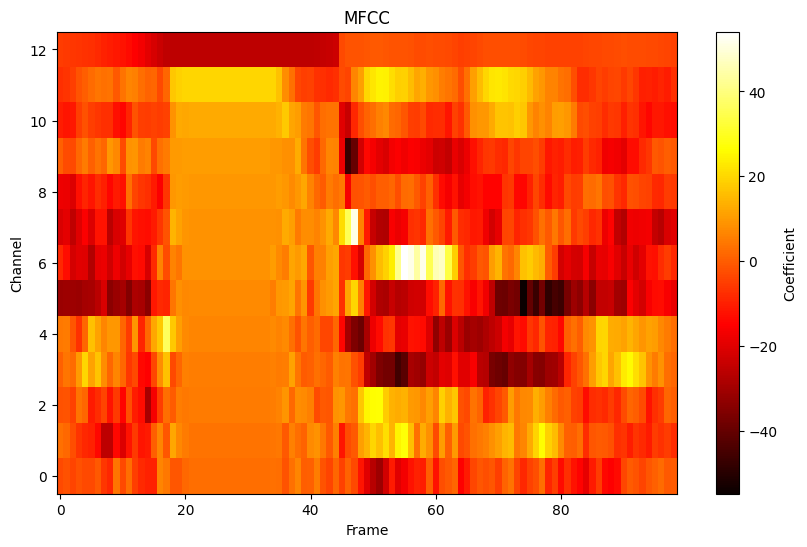

tf.Tensor(1.0, shape=(), dtype=float32)


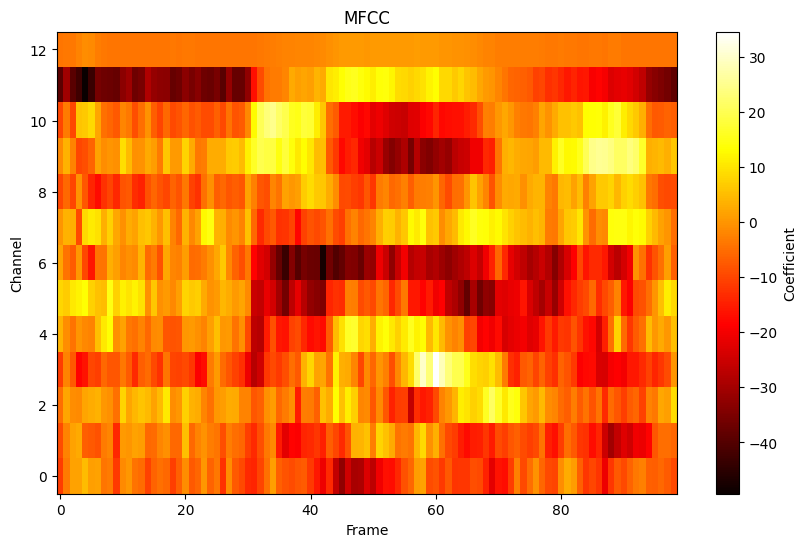

tf.Tensor(0.0, shape=(), dtype=float32)


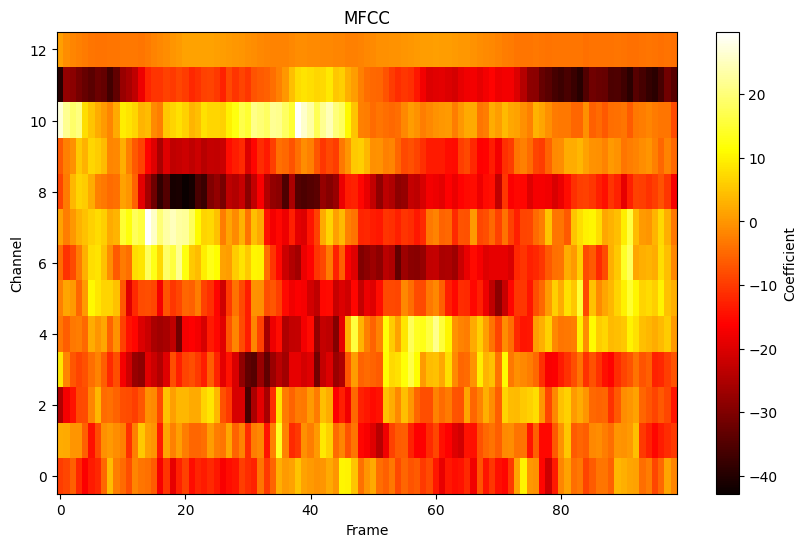

tf.Tensor(0.0, shape=(), dtype=float32)


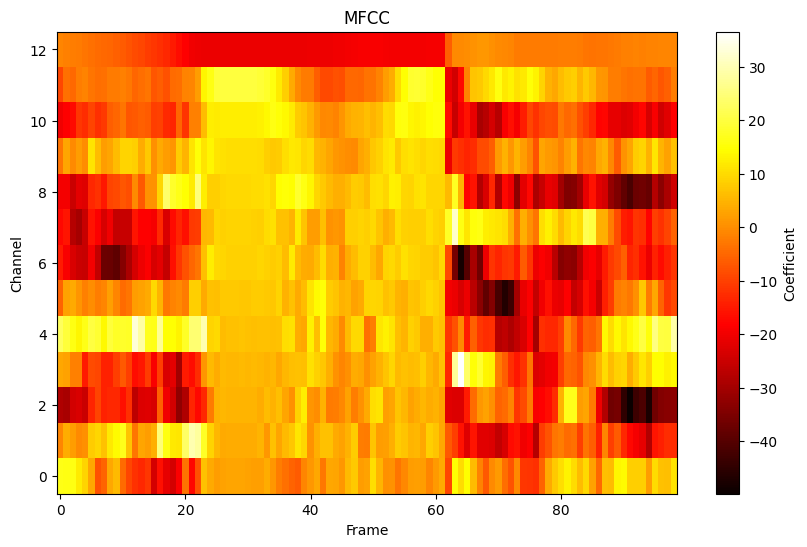

tf.Tensor(0.0, shape=(), dtype=float32)


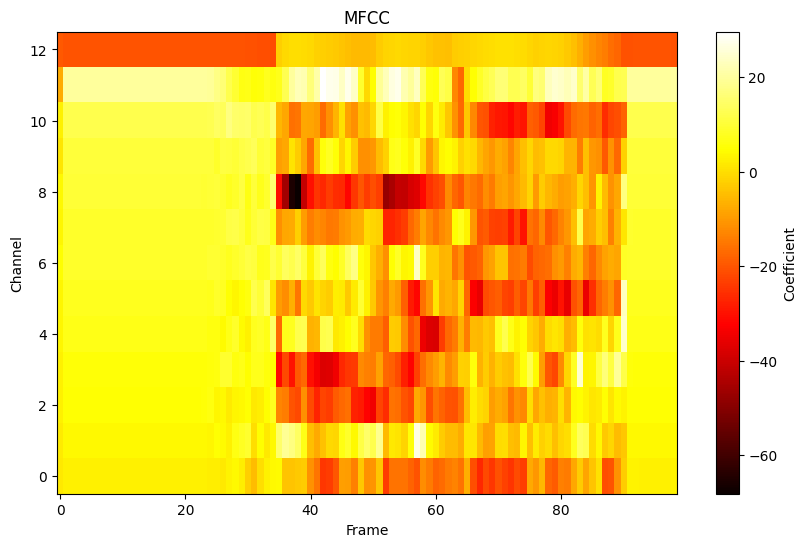

tf.Tensor(0.0, shape=(), dtype=float32)


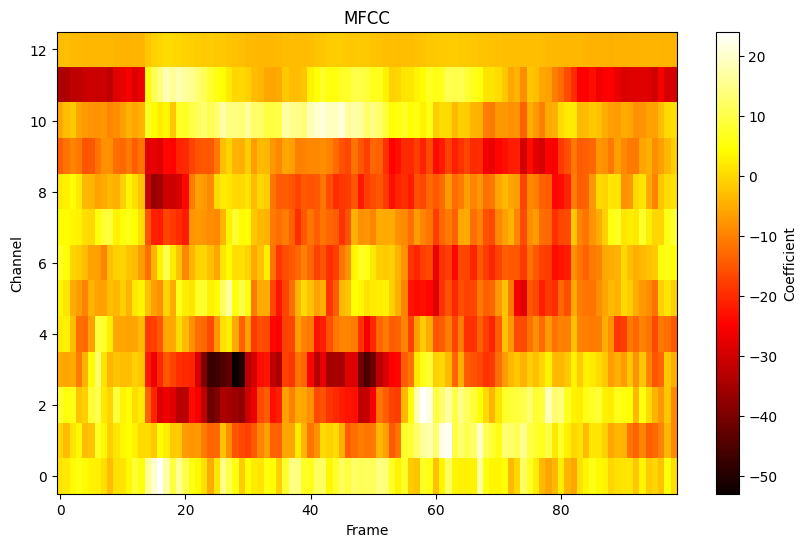

tf.Tensor(1.0, shape=(), dtype=float32)


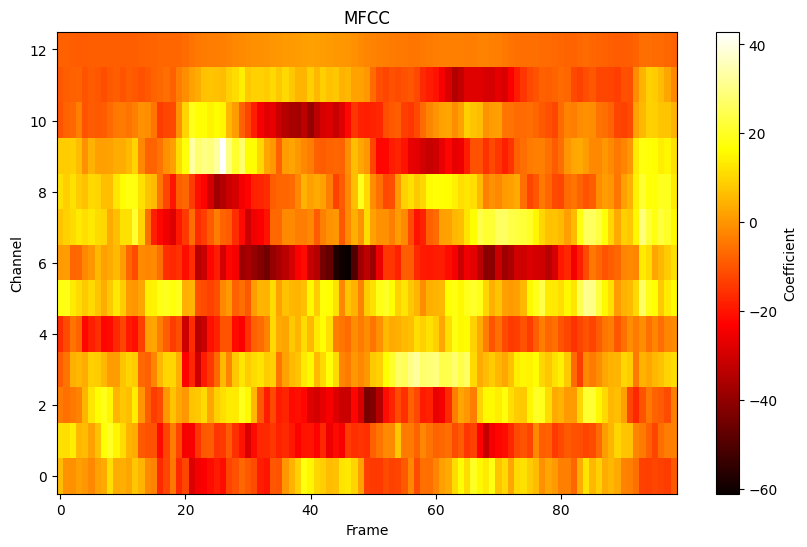

tf.Tensor(0.0, shape=(), dtype=float32)


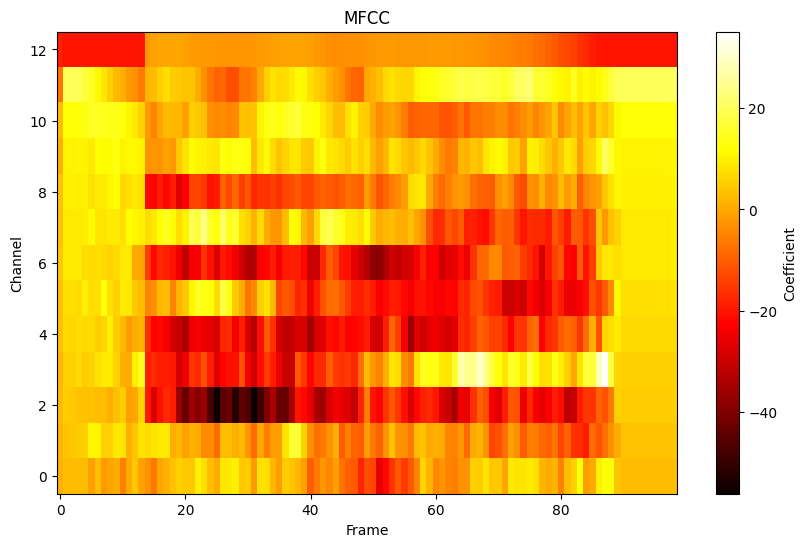

tf.Tensor(0.0, shape=(), dtype=float32)


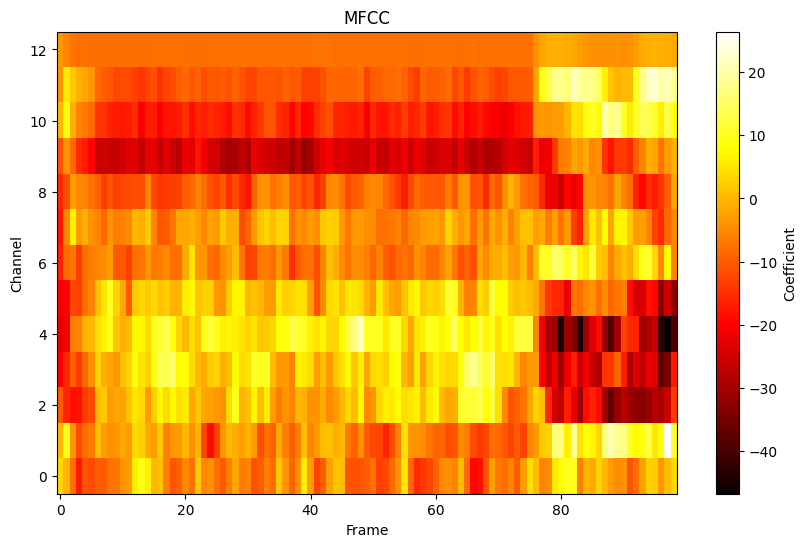

tf.Tensor(1.0, shape=(), dtype=float32)


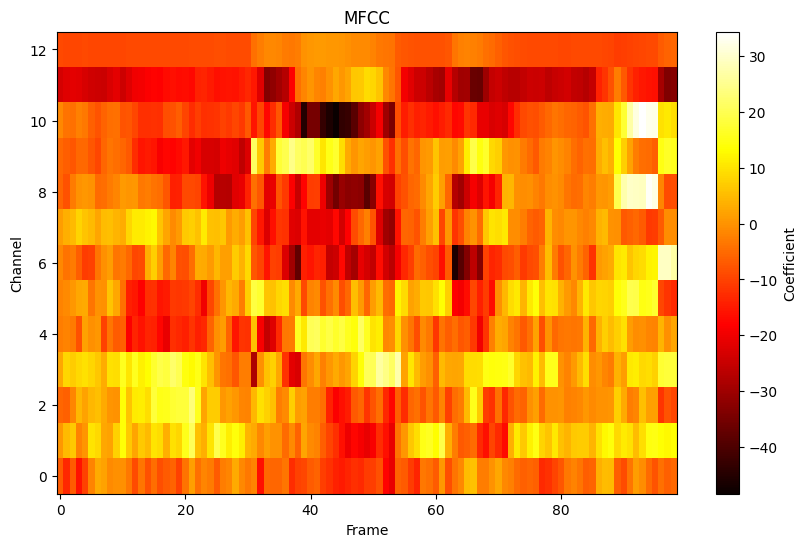

tf.Tensor(0.0, shape=(), dtype=float32)


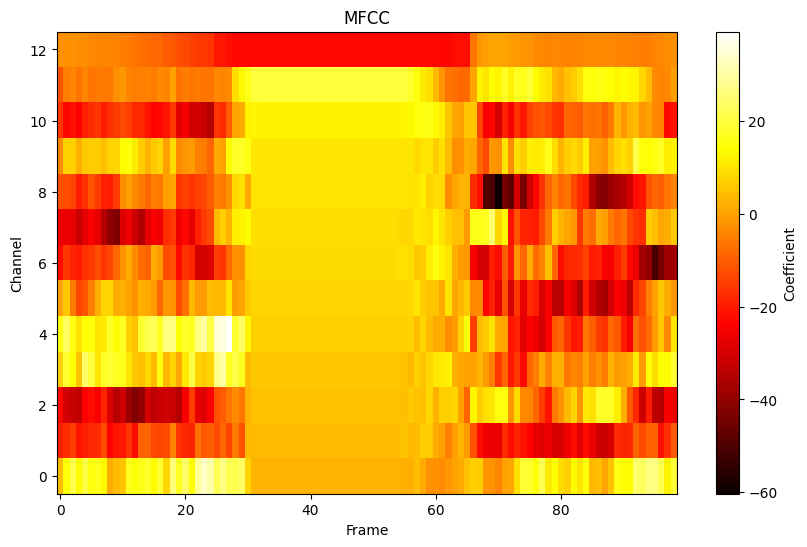

tf.Tensor(0.0, shape=(), dtype=float32)


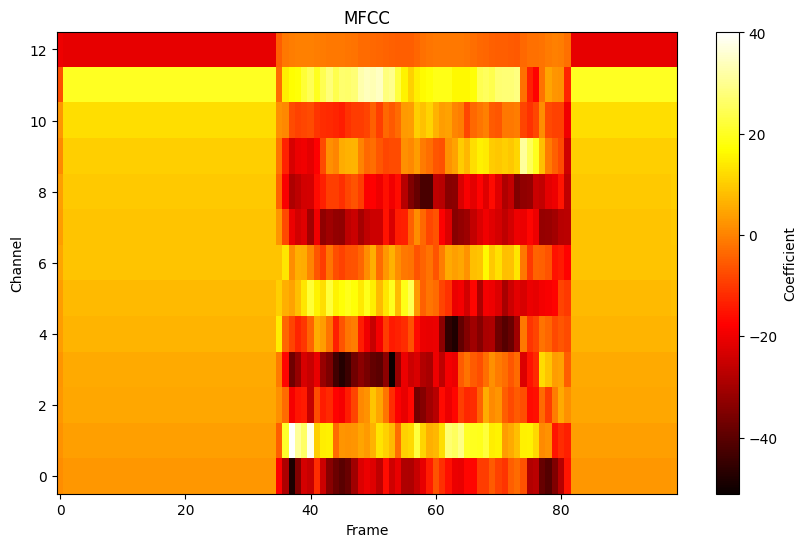

tf.Tensor(1.0, shape=(), dtype=float32)


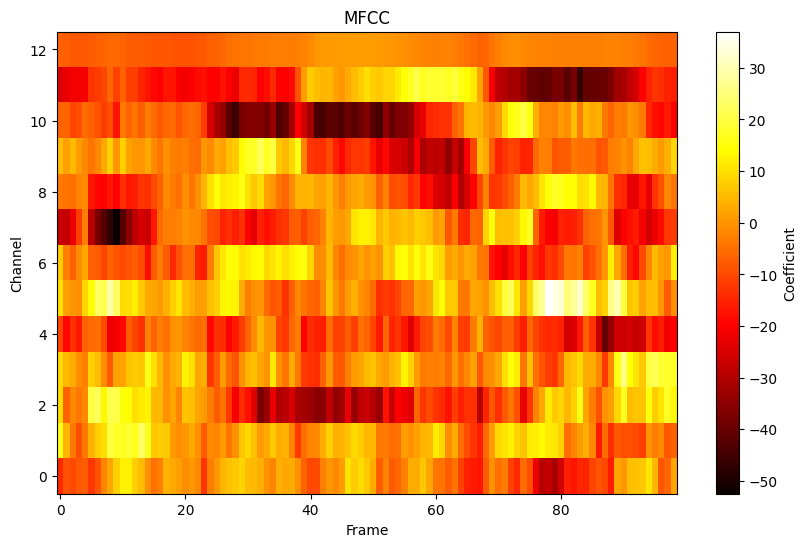

tf.Tensor(1.0, shape=(), dtype=float32)


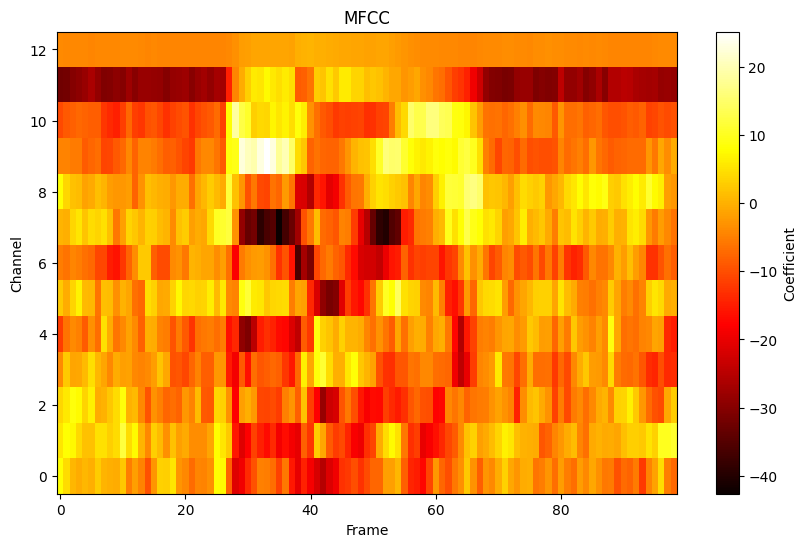

tf.Tensor(0.0, shape=(), dtype=float32)


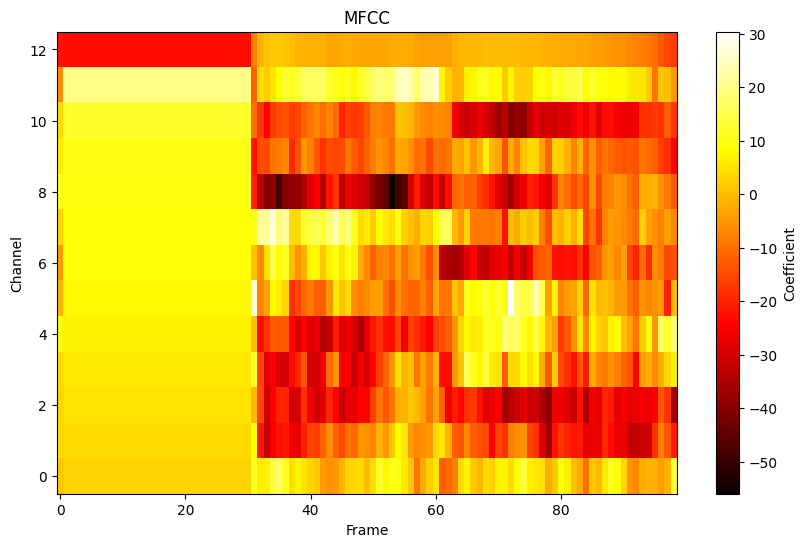

tf.Tensor(0.0, shape=(), dtype=float32)


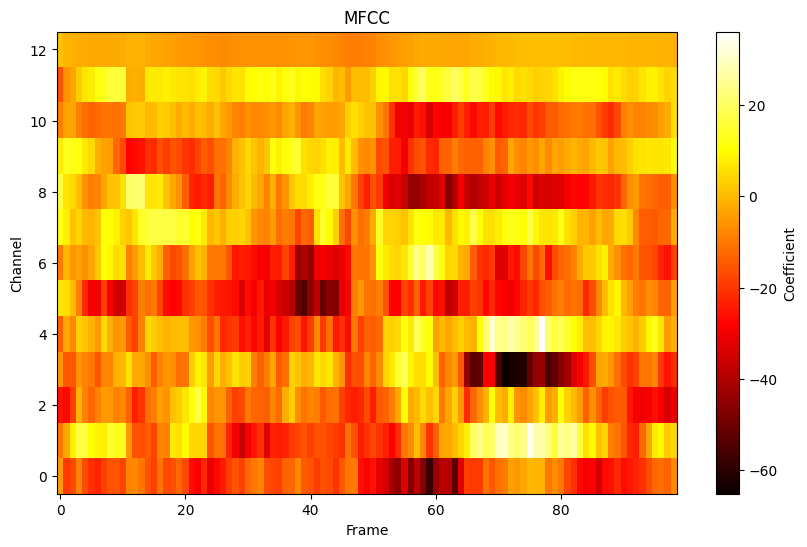

tf.Tensor(1.0, shape=(), dtype=float32)


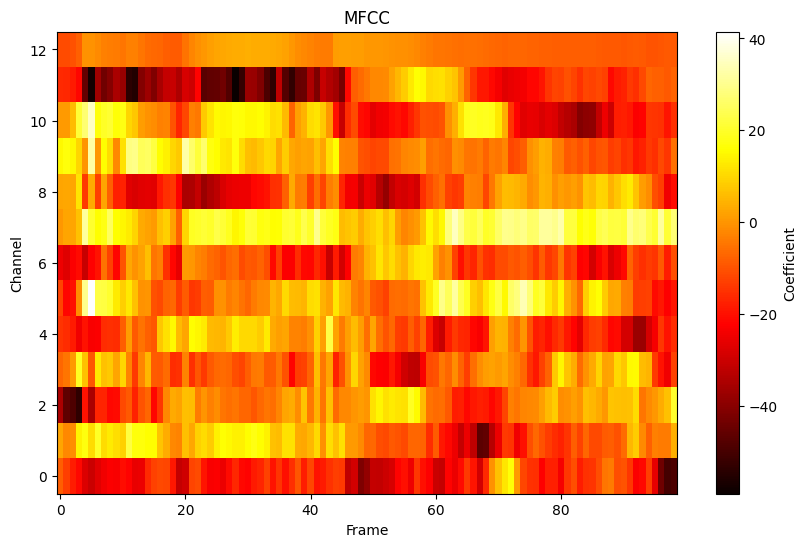

tf.Tensor(1.0, shape=(), dtype=float32)


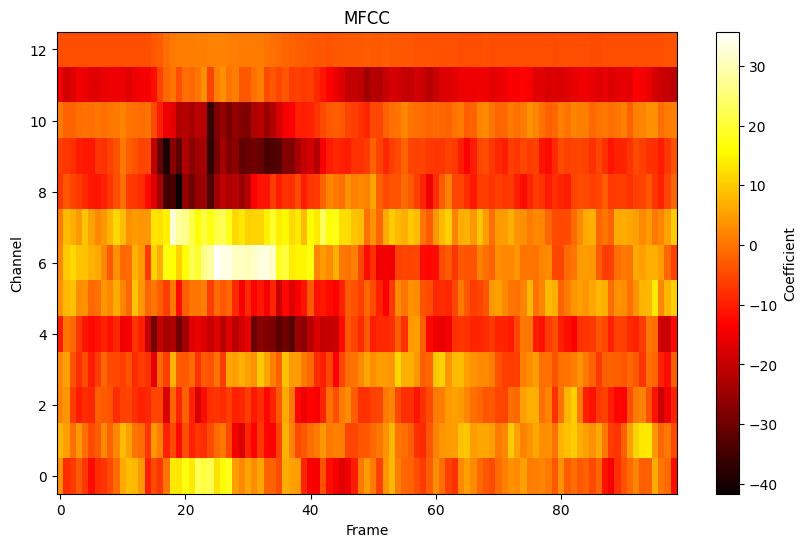

tf.Tensor(0.0, shape=(), dtype=float32)


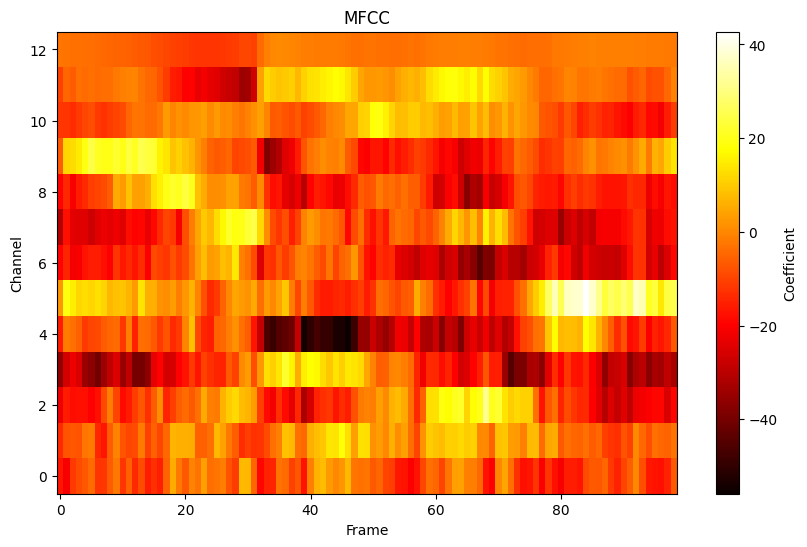

tf.Tensor(0.0, shape=(), dtype=float32)


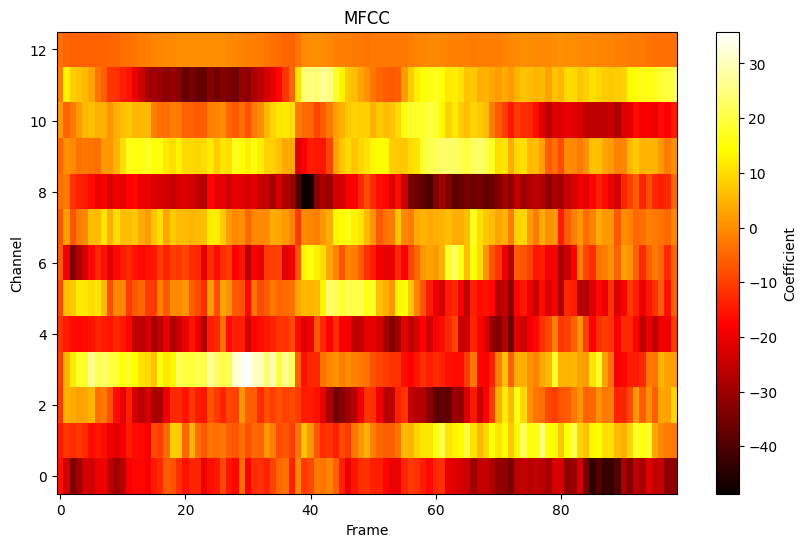

tf.Tensor(0.0, shape=(), dtype=float32)


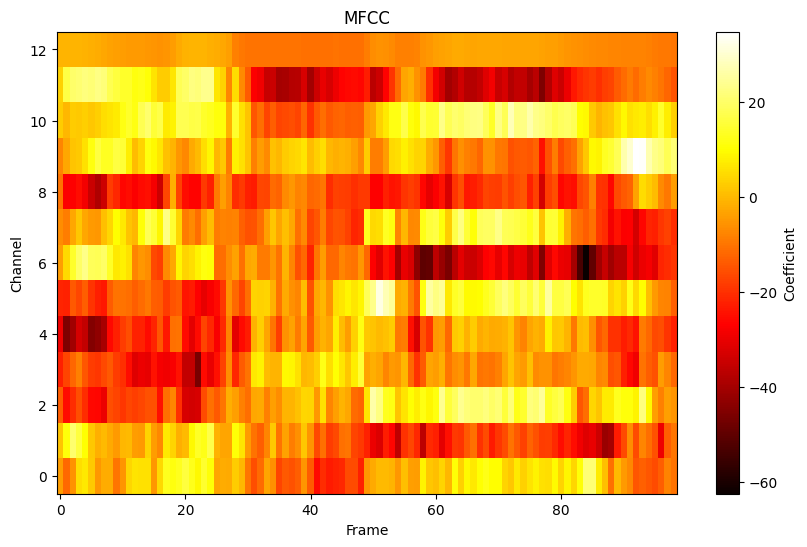

tf.Tensor(0.0, shape=(), dtype=float32)


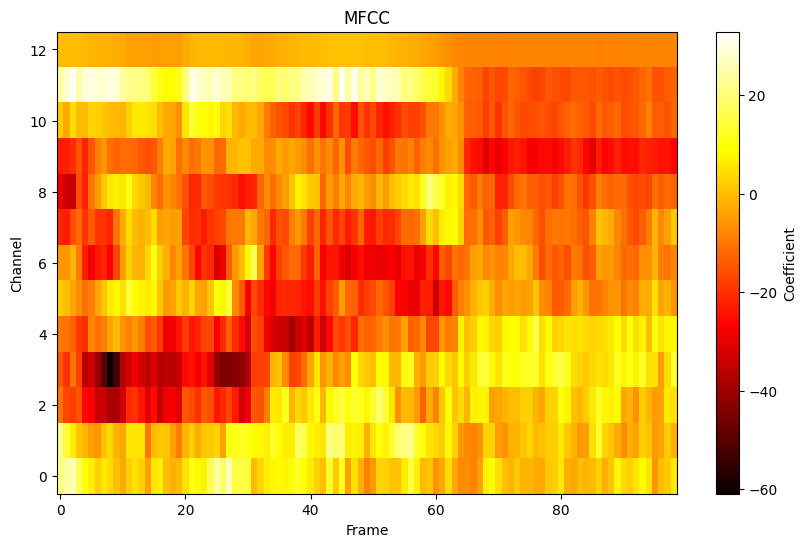

tf.Tensor(1.0, shape=(), dtype=float32)


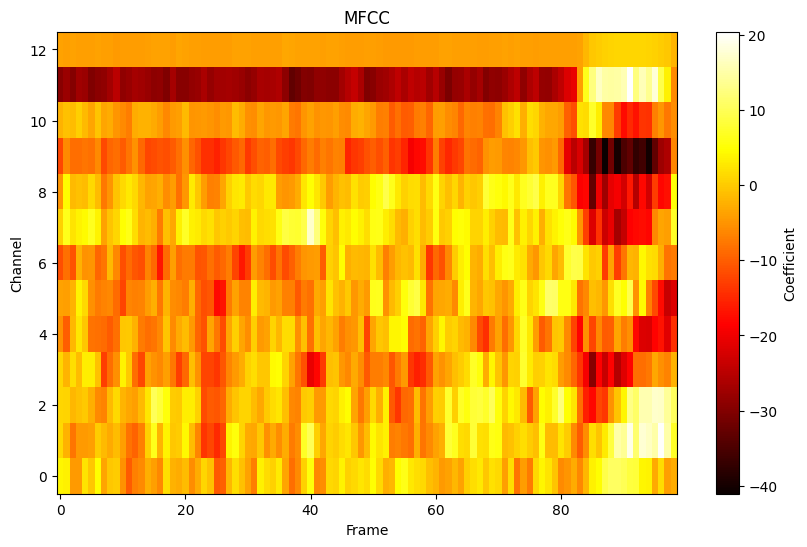

tf.Tensor(1.0, shape=(), dtype=float32)


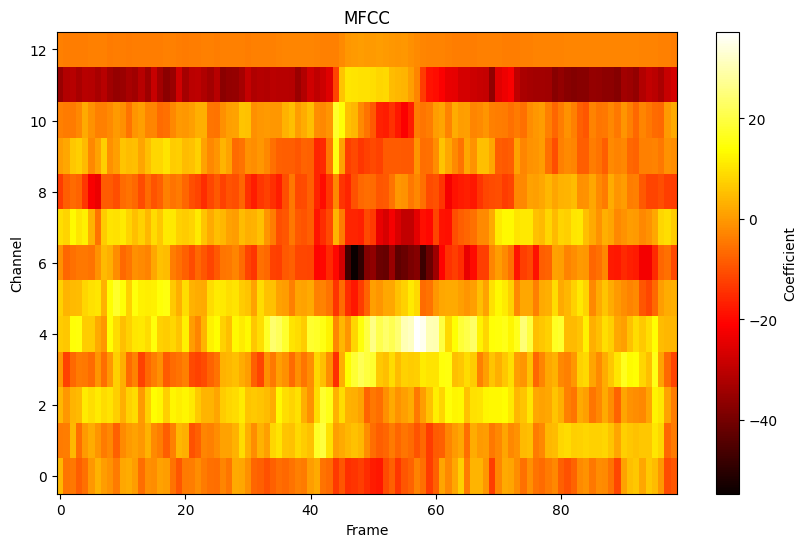

tf.Tensor(0.0, shape=(), dtype=float32)


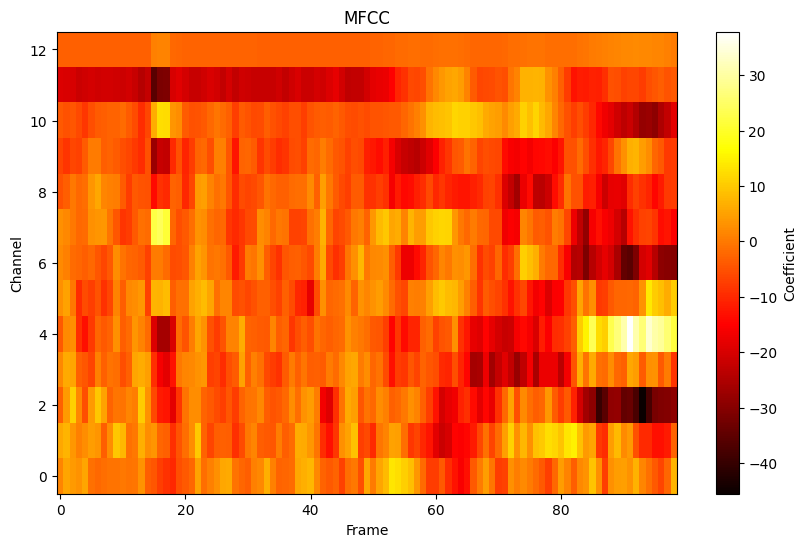

tf.Tensor(1.0, shape=(), dtype=float32)


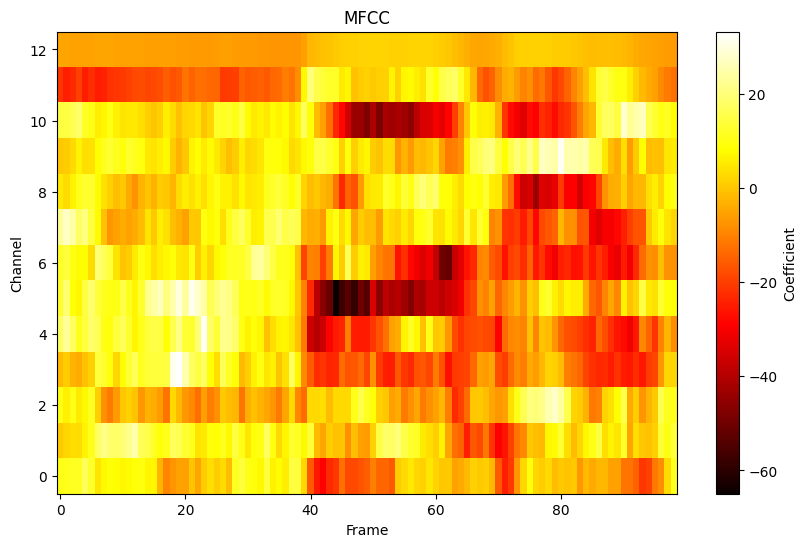

tf.Tensor(0.0, shape=(), dtype=float32)


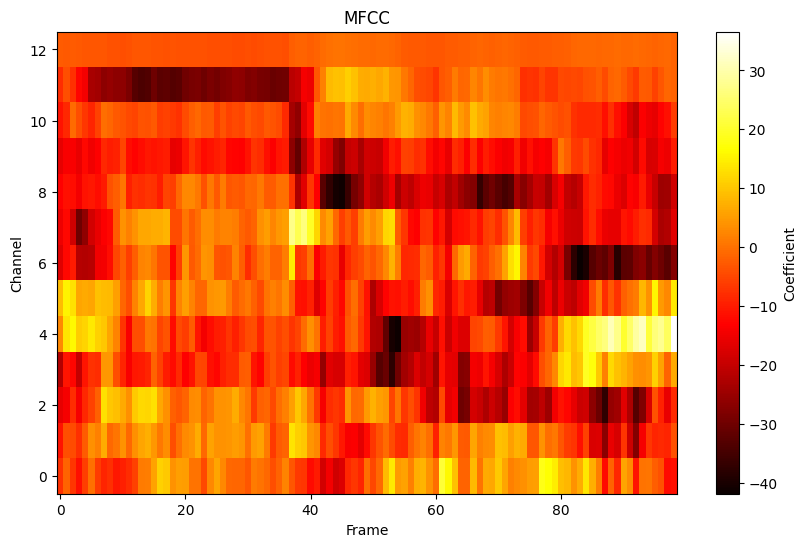

tf.Tensor(1.0, shape=(), dtype=float32)


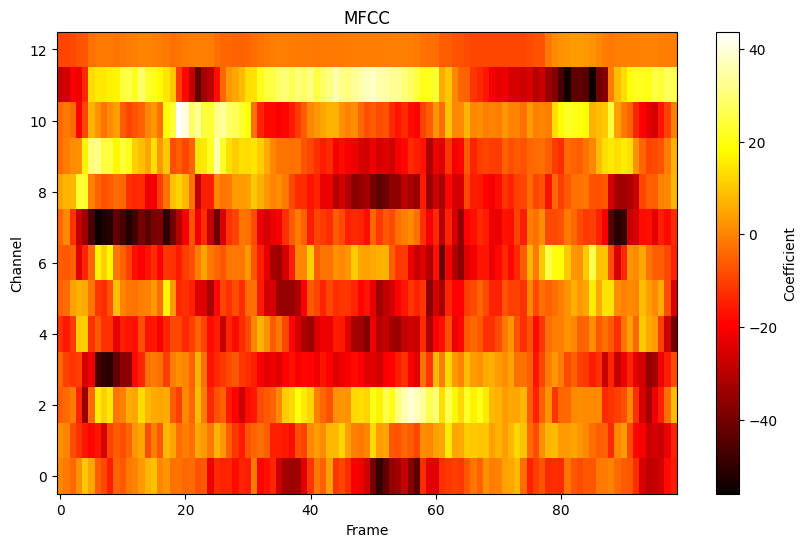

tf.Tensor(1.0, shape=(), dtype=float32)


2023-04-27 06:50:02.951687: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


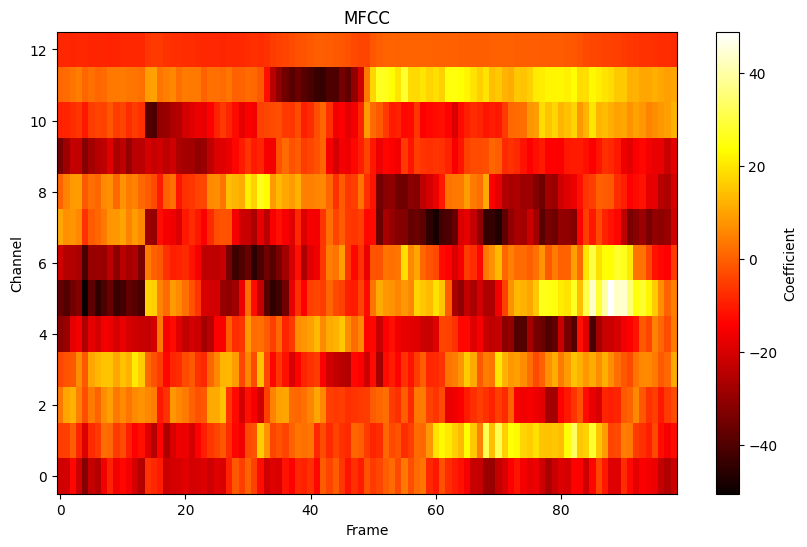

In [126]:
for mfcc, label in train_dataset.take(BATCH_SIZE):
    mfcc = mfcc[0].numpy()
    print(label[0])
    plot_mfcc(mfcc)
    
#     plot_mfcc(mfcc, desc="komputer")
#     hop_length = 160
#     win_length = 320
#     n_fft = 512
#     signal = rosa.feature.inverse.mfcc_to_audio(mfcc, lifter=22, length=16000, sr=16000, n_mels=26, hop_length=hop_length, n_fft=n_fft, win_length=win_length)
#     print(signal)
#     print(len(signal))
#     display(Audio(signal, rate=16000))
#     break

In [127]:
model = Sequential([
    Conv2D(16, (3,3), 
           padding='same',
           activation='relu',
#            kernel_regularizer=regularizers.l2(0.001),
           name='conv_layer1',
           input_shape=(IMG_WIDTH, IMG_HEIGHT, 1)),
    MaxPooling2D(name='max_pooling1', pool_size=(5, 2)),
    Dropout(0.2),
    Conv2D(32, (3,3), 
           padding='same',
           activation='relu',
#            kernel_regularizer=regularizers.l2(0.001),
           name='conv_layer2'),
    MaxPooling2D(name='max_pooling2', pool_size=(5,2)),
    Dropout(0.2),
#     Conv2D(32, (3,3), 
#            padding='same',
#            activation='relu',
# #            kernel_regularizer=regularizers.l2(0.001),
#            name='conv_layer3'),
#     MaxPooling2D(name='max_pooling3', pool_size=(2,2)),
#     Dropout(0.2),
    Flatten(),
    Dense(
        80,
        activation='relu',
#         kernel_regularizer=regularizers.l2(0.001),
        name='hidden_layer1'
    ),
    Dense(
        1,
        activation='sigmoid',
#         kernel_regularizer=regularizers.l2(0.001),
        name='output'
    )
])
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_layer1 (Conv2D)        (None, 99, 13, 16)        160       
                                                                 
 max_pooling1 (MaxPooling2D)  (None, 19, 6, 16)        0         
                                                                 
 dropout_27 (Dropout)        (None, 19, 6, 16)         0         
                                                                 
 conv_layer2 (Conv2D)        (None, 19, 6, 32)         4640      
                                                                 
 max_pooling2 (MaxPooling2D)  (None, 3, 3, 32)         0         
                                                                 
 dropout_28 (Dropout)        (None, 3, 3, 32)          0         
                                                                 
 flatten_12 (Flatten)        (None, 288)             

In [ ]:
# model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
#     filepath="checkpoint.model",
#     monitor='val_accuracy',
#     mode='max',
#     save_best_only=True)

EPOCHS=50

earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

history = model.fit(
    train_dataset,
    epochs=EPOCHS,
    validation_data=val_dataset,
    callbacks=[earlystop]
)

Epoch 1/50
3549/3549 [==============================] - 49s 14ms/step - loss: 0.7131 - accuracy: 0.5342 - val_loss: 0.6930 - val_accuracy: 0.5264
Epoch 2/50
3549/3549 [==============================] - 42s 12ms/step - loss: 0.6909 - accuracy: 0.5344 - val_loss: 0.6923 - val_accuracy: 0.5264
Epoch 3/50
3549/3549 [==============================] - 42s 12ms/step - loss: 0.6908 - accuracy: 0.5344 - val_loss: 0.6922 - val_accuracy: 0.5264
Epoch 4/50
3549/3549 [==============================] - 45s 13ms/step - loss: 0.6908 - accuracy: 0.5344 - val_loss: 0.6921 - val_accuracy: 0.5264
Epoch 5/50
3549/3549 [==============================] - 44s 12ms/step - loss: 0.6908 - accuracy: 0.5344 - val_loss: 0.6921 - val_accuracy: 0.5264
Epoch 6/50
3549/3549 [==============================] - 44s 12ms/step - loss: 0.6908 - accuracy: 0.5344 - val_loss: 0.6921 - val_accuracy: 0.5264
Epoch 7/50
3549/3549 [==============================] - 43s 12ms/step - loss: 0.6908 - accuracy: 0.5344 - val_loss: 0.6920 -

In [24]:
model.save("trained.model")
model2 =  keras.models.load_model("trained.model")
results = model2.evaluate(test_dataset, batch_size=128)

INFO:tensorflow:Assets written to: trained.model/assets


INFO:tensorflow:Assets written to: trained.model/assets


419/419 [==============================] - 8s 18ms/step - loss: 0.0448 - accuracy: 0.9943


In [13]:
predictions = model2.predict(X_test, 128)

NameError: name 'X_test' is not defined

In [15]:
import itertools


def plot_confusion_matrix(cm, class_names):
    cm = cm.numpy()
    # Normalize the confusion matrix.
    cm = np.around(cm.astype("float") / cm.sum(axis=1)[:, np.newaxis], decimals=2)

    figure = plt.figure(figsize=(8, 8))
    plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
    plt.title("Confusion matrix")
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)

    # Use white text if squares are dark; otherwise black.
    threshold = cm.max() / 2.0
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        color = "white" if cm[i, j] > threshold else "black"
        plt.text(j, i, cm[i, j], horizontalalignment="center", color=color)

    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()
#     return figure

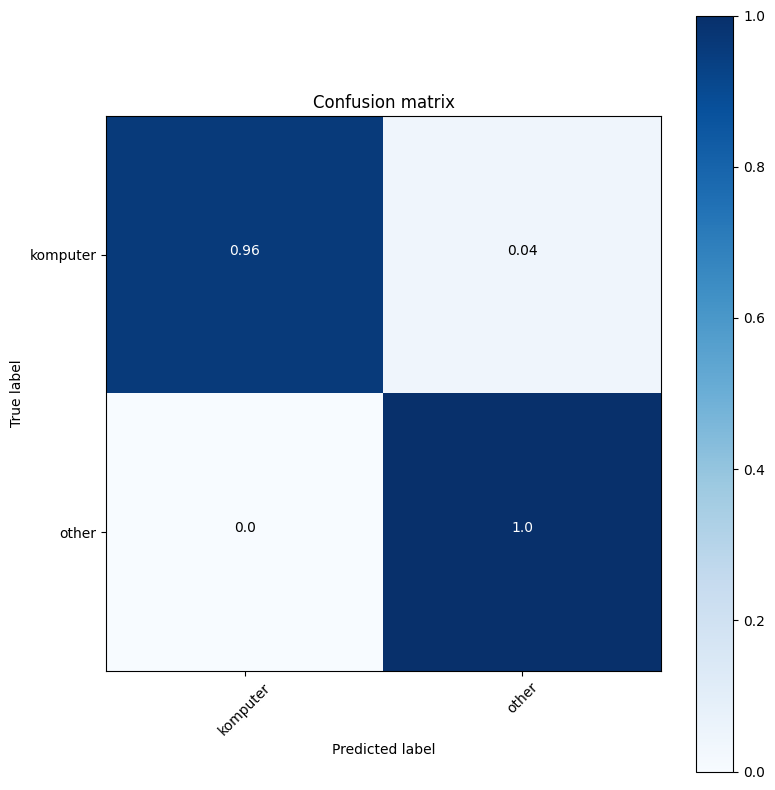

In [37]:
cm = tf.math.confusion_matrix(
    labels=tf.argmax(Y_test, 1), predictions=tf.argmax(predictions, 1)
)

plot_confusion_matrix(cm, command_words)

In [38]:
batch_size = 32
complete_train_X = np.concatenate((X_train, X_validate, X_test))
complete_train_Y = np.concatenate((Y_train, Y_validate, Y_test))

complete_train_dataset = Dataset.from_tensor_slices((complete_train_X, complete_train_Y)).repeat(count=-1).shuffle(len(complete_train_X)).batch(batch_size)

In [39]:
history = model2.fit(
    complete_train_dataset,
    steps_per_epoch=len(complete_train_X) // batch_size,
    epochs=5
)

Epoch 1/5
3684/3684 [==============================] - 90s 24ms/step - loss: 5.7873 - accuracy: 0.9703
Epoch 2/5
3684/3684 [==============================] - 92s 25ms/step - loss: 42318.1680 - accuracy: 0.8267
Epoch 3/5
3684/3684 [==============================] - 93s 25ms/step - loss: 576963.6250 - accuracy: 0.8148
Epoch 4/5
3684/3684 [==============================] - 92s 25ms/step - loss: 2853364.0000 - accuracy: 0.8133
Epoch 5/5
3684/3684 [==============================] - 93s 25ms/step - loss: 8144704.0000 - accuracy: 0.8103


In [40]:
model2.save("fully_trained.model")

INFO:tensorflow:Assets written to: fully_trained.model/assets


INFO:tensorflow:Assets written to: fully_trained.model/assets


In [41]:
results = model2.evaluate(complete_train_X, tf.cast(complete_train_Y, tf.float32), batch_size=128)

922/922 [==============================] - 16s 17ms/step - loss: 20515298.0000 - accuracy: 0.8975


In [42]:
predictions = model2.predict(complete_train_X, 128)

922/922 [==============================] - 8s 8ms/step


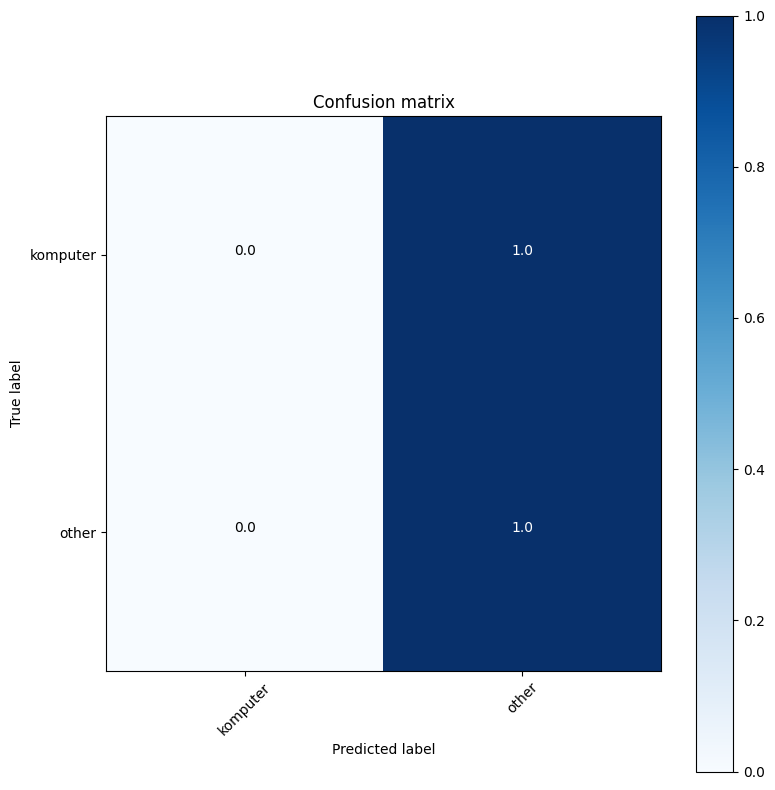

In [43]:
cm = tf.math.confusion_matrix(
    labels=tf.argmax(complete_train_Y, 1), predictions=tf.argmax(predictions, 1)
)

plot_confusion_matrix(cm, command_words)